# Heart Failure Prediction

## Import Library

In [29]:
# data analysis
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model building
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree

# model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

# k-fold cross validation
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [30]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [31]:
heart_failure.shape

(299, 13)

In [32]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [33]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [34]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Visualization

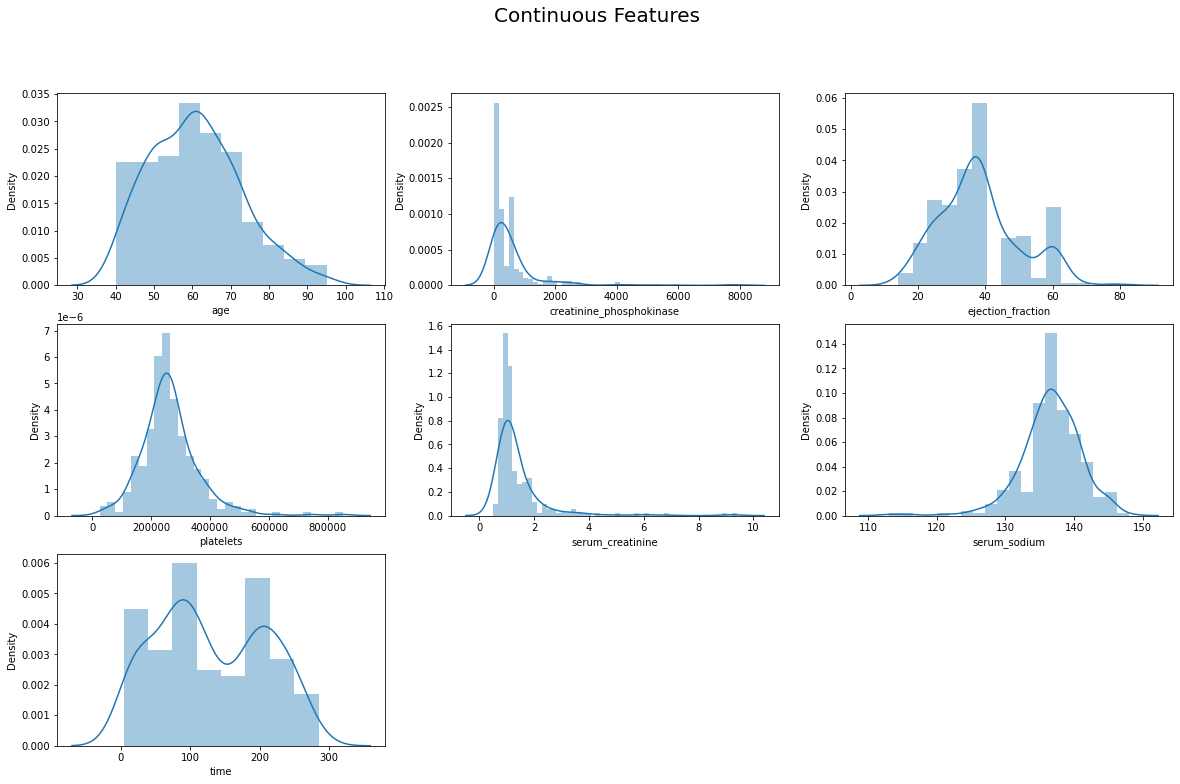

In [35]:
plt.figure(figsize=(20,12))
plt.suptitle('Continuous Features', fontsize=20)
data_continuous =  heart_failure[['age', 'creatinine_phosphokinase', 'ejection_fraction',
                                  'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
for i in range(0, len(data_continuous.columns)):
    plt.subplot(3, 3, i+1)

    sns.distplot(data_continuous.iloc[:, i])

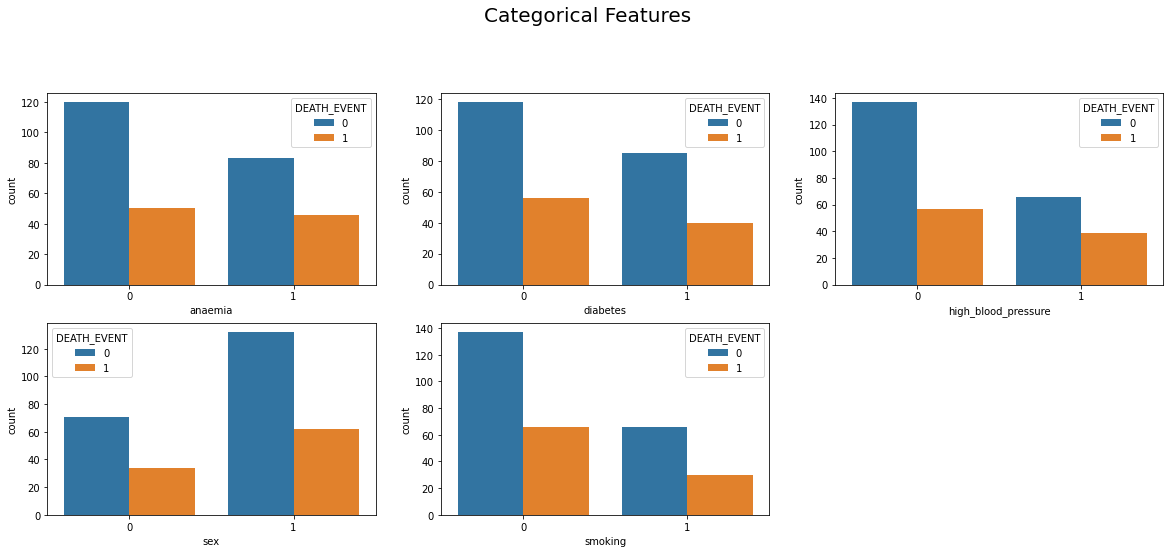

In [36]:
plt.figure(figsize=(20,12))
plt.suptitle('Categorical Features', fontsize=20)
data_categorical =  heart_failure[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
for i in range(0, len(data_categorical.columns)-1):
    plt.subplot(3, 3, i+1)

    sns.countplot(data_categorical.iloc[:, i], hue=data_categorical['DEATH_EVENT'])

### Feature Correlation

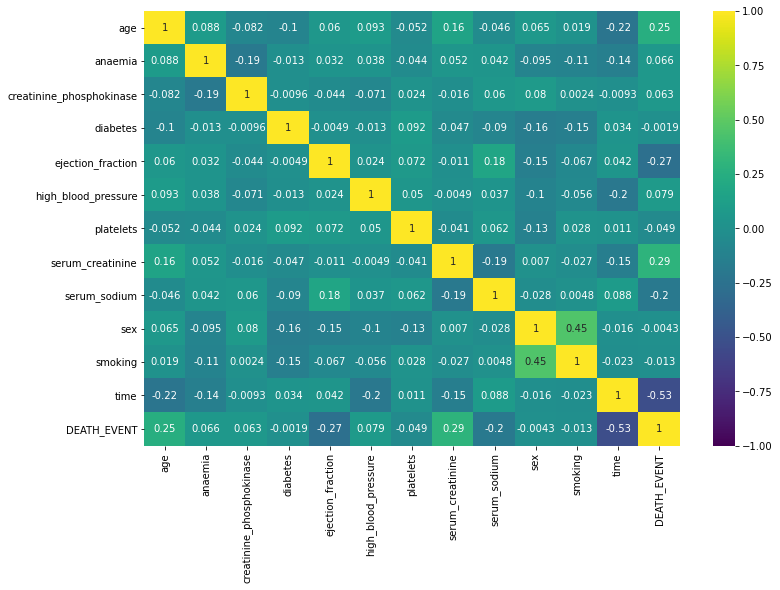

In [37]:
plt.figure(figsize=(12,8))
data_corr = heart_failure.corr()
sns.heatmap(data_corr, vmin=-1, annot=True, cmap='viridis')
plt.show()

## Data Modelling

### Feature Selection

In [38]:
# selecting features if correlation with target > +/-0.1
data_corr[abs(data_corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [39]:
X = heart_failure[['age','ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = heart_failure['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [41]:
model = []
model_accuracy = []

### Logistic Regression

In [42]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

acc1=accuracy_score(y_test,pred_lr)
model.append('Logistic Regression')
model_accuracy.append(acc1*100)
print("Logistic Regression Success Rate :", "{:.2f}%".format(100*acc1))

Logistic Regression Success Rate : 80.00%


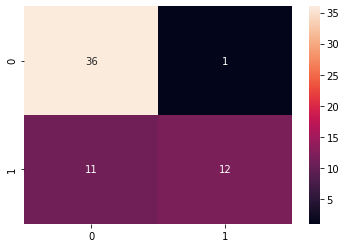

In [43]:
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True)
plt.show()

### Naive Bayes

In [44]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

acc2=accuracy_score(y_test,pred_nb)
model.append('Naive Bayes')
model_accuracy.append(acc2*100)
print("Naive Bayes Success Rate :", "{:.2f}%".format(100*acc2))

Naive Bayes Success Rate : 80.00%


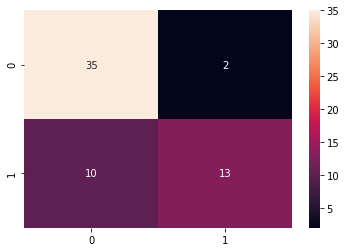

In [45]:
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True)
plt.show()

### Support Vector Machine

In [46]:
svm = SVC(random_state=0, kernel='rbf')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

acc3=accuracy_score(y_test,pred_svm)
model.append('Support Vector Machine')
model_accuracy.append(acc3*100)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*acc3))

Support Vector Machine Success Rate : 80.00%


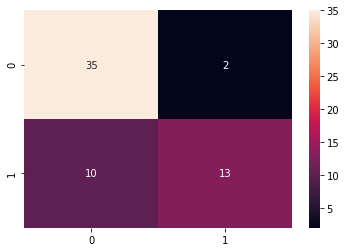

In [47]:
sns.heatmap(confusion_matrix(y_test, pred_svm), annot=True)
plt.show()

### Decision Tree

In [48]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

acc4=accuracy_score(y_test,pred_dt)
model.append('Decision Tree')
model_accuracy.append(acc4*100)
print("Decision Tree Success Rate :", "{:.2f}%".format(100*acc4))

Decision Tree Success Rate : 88.33%


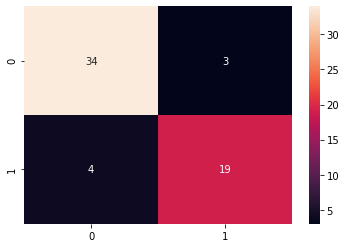

In [49]:
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True)
plt.show()

### Random Forest

In [50]:
rf = RandomForestClassifier(criterion='entropy', n_jobs=10, random_state=10)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

acc5=accuracy_score(y_test,pred_rf)
model.append('Random Forest')
model_accuracy.append(acc5*100)
print("Random Forest Success Rate :", "{:.2f}%".format(100*acc5))

Random Forest Success Rate : 86.67%


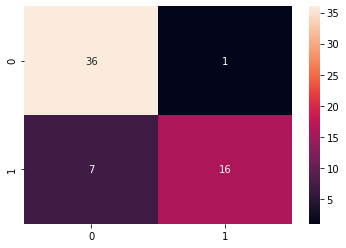

In [51]:
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True)
plt.show()

### Comparison Model

In [52]:
data_model = pd.DataFrame({'Model':model, 'Accuracy':model_accuracy})
data_model

,Model,Accuracy
0,Logistic Regression,80.000000
1,Naive Bayes,80.000000
2,Support Vector Machine,80.000000
3,Decision Tree,88.333333
4,Random Forest,86.666667


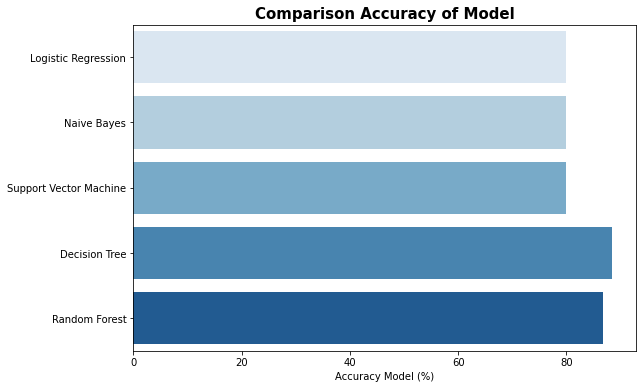

In [53]:
plt.figure(figsize=(9,6))
sns.barplot(data=data_model, x='Accuracy', y='Model', palette='Blues')
plt.title('Comparison Accuracy of Model', fontsize=15, fontweight='bold')
plt.xlabel('Accuracy Model (%)')
plt.ylabel('')
plt.show()

In [54]:
# Calculating K Fold Cross Validation scores for the models
accuracies_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
accuracies_nb = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
accuracies_svm = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
accuracies_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
accuracies_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In [55]:
kfold_acc_mean = [np.mean(accuracies_lr), np.mean(accuracies_nb), np.mean(accuracies_svm), 
                  np.mean(accuracies_dt), np.mean(accuracies_rf)]

kfold_acc_std = [np.std(accuracies_lr), np.std(accuracies_nb), np.std(accuracies_svm), 
                  np.std(accuracies_dt), np.std(accuracies_rf)]

In [56]:
KFold = pd.DataFrame({'Model': model, 'KFold accuracies mean': kfold_acc_mean, 
                      'KFold accuracies std': kfold_acc_std})
print(KFold)

                    Model  KFold accuracies mean  KFold accuracies std
0     Logistic Regression               0.841123              0.048245
1             Naive Bayes               0.803442              0.069577
2  Support Vector Machine               0.807246              0.051356
3           Decision Tree               0.807609              0.046057
4           Random Forest               0.861775              0.042432
